Model Evaluation for Logistic Regression 

In [11]:
import import_ipynb
import matplotlib.pyplot as plt
import logistic_regression as lr # from logistic_regression.ipynb

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

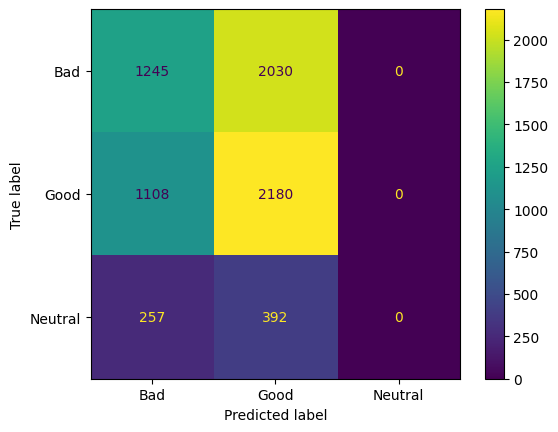

In [12]:
cm = confusion_matrix(lr.y_test, lr.y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Bad', 'Good', 'Neutral'])
cm_display.plot()
plt.show()

c:\Users\lisal\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


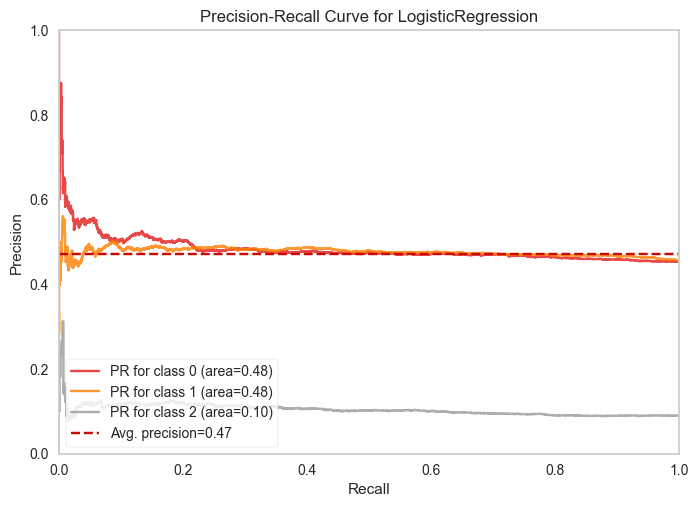

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [13]:
from yellowbrick.classifier import PrecisionRecallCurve

# y_train_binary = lr.y_train.replace(['Bad', 'Good', 'Neutral'], [0, 1, 2]) # 0 - Bad, 1 - Good, 2 - Neutral
# y_test_binary = lr.y_test.replace(['Bad', 'Good', 'Neutral'], [0, 1, 2]) # 0 - Bad, 1 - Good, 2 - Neutral

le = LabelEncoder()
le.fit(lr.y_train)
y_train_binary = le.transform(lr.y_train)
y_test_binary = le.transform(lr.y_test)

viz = PrecisionRecallCurve(
    lr.model,
    per_class = True,
    cmap = "Set1"
)

viz.fit(lr.X_train, y_train_binary)
viz.score(lr.X_test, y_test_binary)
viz.show()

Model Evaluation for Random Forest Classifier 

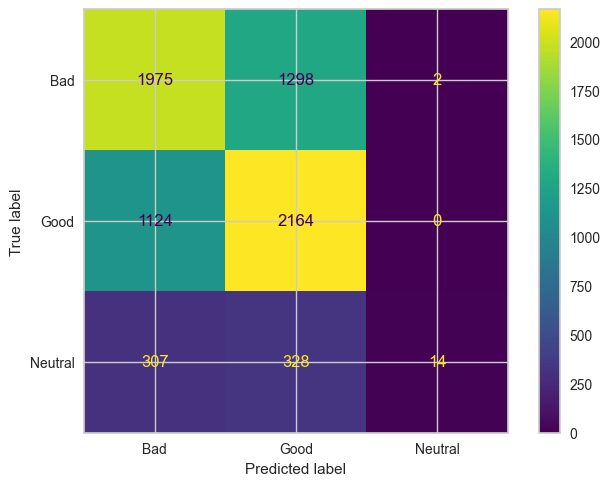

In [15]:
import Random_Forest_Classifier as rf # from Random Forest Classifier.ipynb

cm = confusion_matrix(rf.y_test, rf.y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Bad', 'Good', 'Neutral'])
cm_display.plot()
plt.show()

c:\Users\lisal\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


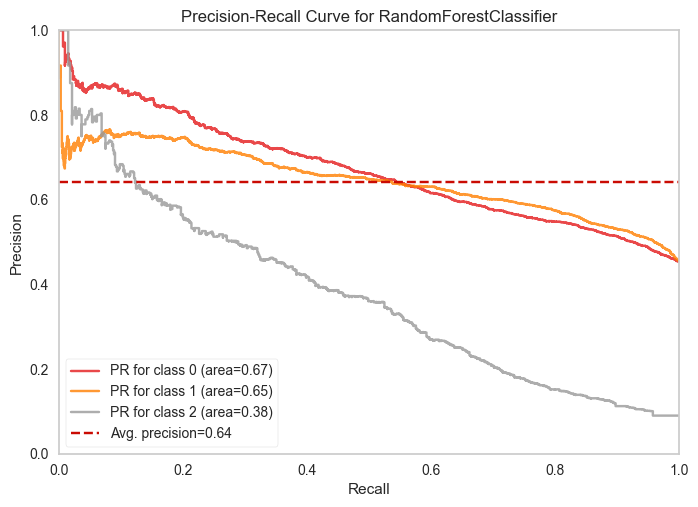

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [16]:
# y_train_binary = rf.y_train.replace(['Bad', 'Good', 'Neutral'], [0, 1, 2]) # 0 - Bad, 1 - Good, 2 - Neutral
# y_test_binary = rf.y_test.replace(['Bad', 'Good', 'Neutral'], [0, 1, 2]) # 0 - Bad, 1 - Good, 2 - Neutral

le = LabelEncoder()
le.fit(rf.y_train)
y_train_binary = le.transform(rf.y_train)
y_test_binary = le.transform(rf.y_test)

viz = PrecisionRecallCurve(
    rf.rfc,
    per_class = True,
    cmap = "Set1"
)

viz.fit(rf.X_train, y_train_binary)
viz.score(rf.X_test, y_test_binary)
viz.show()

Model evaluation for Neural Network

In [10]:
import Neural_Network_v2 as NN # from Neural_Network_v2.ipynb
import pandas as pd

# y_pred_nn = NN.model_2lab.predict(NN.X_test_2label_top_10)
# y_pred_list = []
# for i in y_pred_nn:
#     y_pred_list.append(i[0])
# df_for_pred = pd.DataFrame({'Predicted  y': y_pred_list})
# df_for_pred.describe()

# y_pred_labels = (y_pred_nn > 0.5).astype(int) # assuming threshold to be > 0.5 gives label 1
# print(y_pred_labels)
# print(NN.y_test_encoded)

226/226 [==============================] - 0s 935us/step
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[1 2 1 ... 1 2 1]


Potential grid search and hyperparam tuning!!